# Quora Question Pairs Similarity Challenge (Kaggle)

The Quora Question Pairs competition on Kaggle challenged participants to build models that could identify duplicate questions. This competition was a significant challenge in natural language processing (NLP), requiring a combination of techniques from text preprocessing, feature engineering, and machine learning.

## The Problem:

* Quora aimed to improve the user experience by reducing the number of duplicate questions.
* The challenge was to determine whether pairs of questions had the same intent.
* This is a semantic similarity problem, where understanding the meaning of the questions is crucial, not just matching keywords.

## The Data:

* The dataset consisted of pairs of questions, along with a binary label indicating whether the questions were duplicates (1) or not (0).
* The questions themselves were text strings, often with variations in phrasing, spelling, and grammar.
* The data was imbalanced, with far more non-duplicate pairs than duplicate pairs.

## The Evaluation Metric:

The evaluation metric is:

* **Log Loss (Binary Logarithmic Loss):**
    * This metric is commonly used for binary classification problems, where the goal is to predict the probability of an instance belonging to a certain class.
    * In this case, it measures the "error" of the predicted probabilities compared to the actual binary labels (duplicate or not duplicate).
    * Essentially, it penalizes incorrect predictions, and the penalty increases as the predicted probability deviates further from the true label.
    * Therefore the goal was to minimize the log loss.

Key aspects of this metric in the context of the competition:

* It emphasizes the importance of accurate probability estimation.
* It heavily penalizes confident but incorrect predictions.

Therefore, participants were tasked with building models that could not only classify question pairs as duplicates or not, but also provide accurate probability scores for those classifications.
## Key Challenges:

* **Semantic Understanding:** Models needed to go beyond simple keyword matching and capture the underlying meaning of the questions.
* **Text Preprocessing:** Cleaning and normalizing the text data was essential, including handling misspellings, contractions, and punctuation.
* **Feature Engineering:** Creating relevant features from the text, such as word embeddings, TF-IDF vectors, and other semantic representations, was critical.
* **Imbalanced Data:** Dealing with the imbalance in the dataset was crucial to prevent models from being biased towards the majority class.
* **Computational Complexity:** working with large text datasets required efficient algorithms and computational resources.

## Common Approaches Competitors Used:

* **Word Embeddings:** Using pre-trained word embeddings like Word2Vec, GloVe, and FastText to represent words and phrases.
* **Sentence Embeddings:** Techniques like Siamese networks and LSTMs to generate sentence-level embeddings.
* **Machine Learning Models:** Training models like gradient boosting machines (e.g., XGBoost, LightGBM) and neural networks on the extracted features.
* **Deep Learning:** Utilizing deep learning architectures, particularly recurrent neural networks (RNNs) and convolutional neural networks (CNNs), to capture the sequential and structural information in the questions.
* **Feature Engineering:** extensive work was done to create features like fuzzy string matching, TFIDF, and other methods of comparing the strings.

## 1. Importing the libraries

In [1]:
import os
import zipfile
import pandas as pd

# libraries for text preprocessing
import re
import string
from bs4 import BeautifulSoup
!pip install contractions
import contractions
from contractions import fix
!pip install emoji
import emoji
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
# tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
# Stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
!pip install distance
import distance

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

# Average word2vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import tqdm
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer

# Modeling
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle

from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import log_loss, make_scorer

from sklearn import metrics
from sklearn.metrics import classification_report,log_loss
import seaborn as sns
!pip install kds
import kds

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 49.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=70a90d55c61dae2e7d3eeb5ddc4c7cf886c57c5616370fbec4f9525dca87888c
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Mounting a drive for accessing glove model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Collecting the data from Kaggle

In [3]:
# step 1
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com.
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'.
This will trigger the download of kaggle.json, a file containing your API credentials.
# step 2 """
!pip install -q kaggle
# step 3
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swapnilransing","key":"ccfc35cfff22c823033ad2ea409fef9b"}'}

In [4]:
# step 4 : creating a directory
!mkdir ~/.kaggle # !rm -rf ~/.kaggle is the command if the directory is already present
# step 5 :copy the file kaggle.json to created directory
!cp kaggle.json ~/.kaggle/
# step 6: permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# step 7 : downloading the particular files
! kaggle competitions download -c quora-question-pairs

 98% 303M/309M [00:03<00:00, 64.7MB/s]
100% 309M/309M [00:04<00:00, 80.2MB/s]


In [6]:
# step 8 : unzipping
# Do this multiple times until a zip file present in content folder
source_dir = '/content/'
os.chdir(source_dir)

file_names = os.listdir(source_dir)
for item in file_names:
  if (item.endswith(".zip")):
    file_name = os.path.abspath(item) # get full path of files
    zip_ref = zipfile.ZipFile(file_name) # create zipfile object
    zip_ref.extractall(source_dir) # extract file to dir
    zip_ref.close() # close file
    os.remove(file_name) # delete zipped file

file_names = os.listdir(source_dir)
for item in file_names:
  if (item.endswith(".zip")):
    file_name = os.path.abspath(item) # get full path of files
    zip_ref = zipfile.ZipFile(file_name) # create zipfile object
    zip_ref.extractall(source_dir) # extract file to dir
    zip_ref.close() # close file
    os.remove(file_name) # delete zipped file

## 3. Exploring the dataset

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.shape

(404290, 6)

In [9]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [11]:
# Lets create a columns of question1 and question2 which will not be processed and will be used further for deployment testing
df['question1_for_dep']=df['question1']
df['question2_for_dep']=df['question2']

In [12]:
df[df['qid1']==50]

,id,qid1,qid2,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
148230,148230,50,233769,How many times a day do a clock’s hands overlap?,How many times do the hour and minute hands of...,1,How many times a day do a clock’s hands overlap?,How many times do the hour and minute hands of...
148371,148371,50,233961,How many times a day do a clock’s hands overlap?,How many times does the hands of the clock ove...,1,How many times a day do a clock’s hands overlap?,How many times does the hands of the clock ove...
244650,244650,50,357323,How many times a day do a clock’s hands overlap?,How many times are the hands of a clock in an ...,0,How many times a day do a clock’s hands overlap?,How many times are the hands of a clock in an ...


In [13]:
df[df['qid2']==50]

,id,qid1,qid2,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
24,24,49,50,What does it mean that every time I look at th...,How many times a day do a clock’s hands overlap?,0,What does it mean that every time I look at th...,How many times a day do a clock’s hands overlap?
121029,121029,196186,50,"During 12 hours, how many times do the minute ...",How many times a day do a clock’s hands overlap?,0,"During 12 hours, how many times do the minute ...",How many times a day do a clock’s hands overlap?
308265,308265,432072,50,How many cookies are there in a britannia good...,How many times a day do a clock’s hands overlap?,0,How many cookies are there in a britannia good...,How many times a day do a clock’s hands overlap?


In [14]:
# lets evaluate count of null quesion column
df[df.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
105780,105780,174363,174364,How can I develop android app?,NaN,0,How can I develop android app?,NaN
201841,201841,303951,174364,How can I create an Android app?,NaN,0,How can I create an Android app?,NaN
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0,NaN,My Chinese name is Haichao Yu. What English na...


In [15]:
# as the count of missing value rows are only 3, lets drop these rows
df.dropna(inplace=True)
df[df.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate,question1_for_dep,question2_for_dep


In [16]:
# lets evaluate count of duplicate question pair column
df.duplicated().value_counts()

,count
False,404287


In [17]:
df.reset_index(drop=True,inplace=True)
df.tail(2) # shape and last row index should be same

,id,qid1,qid2,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,What is the approx annual cost of living while...,I am having little hairfall problem but I want...
404286,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0,What is like to have sex with cousin?,What is it like to have sex with your cousin?


In [18]:
print("Shape of dataframe is ",df.shape)
print("Unique count of column id are ",df.id.nunique())
print("Unique count of qid1 are ",df.qid1.nunique())
print("Max value of qid1 are ",df.qid1.max())
print("Min value of qid1 are ",df.qid1.min())
print("Unique count of qid2 are ",df.qid2.nunique())
print("Max value of qid2 are ",df.qid2.max())
print("Min value of qid2 are ",df.qid2.min())
print("Total unique questions count in qid1 and qid2 from dataframe are",len(set(df.qid1.unique())|set(df.qid2.unique()))) # set union
print("Common questions count in qid1 and qid2 from dataframe are",len(set(df.qid1.unique())&set(df.qid2.unique()))) # set intersection
print("not common/Distinct questions count in qid1 and qid2 from dataframe are",len(set(df.qid1.unique())^set(df.qid2.unique()))) # set symetric difference

Shape of dataframe is  (404287, 8)
Unique count of column id are  404287
Unique count of qid1 are  290652
Max value of qid1 are  537932
Min value of qid1 are  1
Unique count of qid2 are  299362
Max value of qid2 are  537933
Min value of qid2 are  2
Total unique questions count in qid1 and qid2 from dataframe are 537929
Common questions count in qid1 and qid2 from dataframe are 52085
not common/Distinct questions count in qid1 and qid2 from dataframe are 485844


In [19]:
df.is_duplicate.value_counts()

,count
is_duplicate,
0,255024
1,149263


In [20]:
df.is_duplicate.value_counts(normalize=True)*100

,proportion
is_duplicate,
0,63.079941
1,36.920059


In [21]:
# samples of question 1
pd.set_option('display.max_colwidth', None)
df['question1'].head(20)

,question1
0,What is the step by step guide to invest in share market in india?
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?
2,How can I increase the speed of my internet connection while using a VPN?
3,Why am I mentally very lonely? How can I solve it?
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?"
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
6,Should I buy tiago?
7,How can I be a good geologist?
8,When do you use シ instead of し?
9,Motorola (company): Can I hack my Charter Motorolla DCX3400?


In [22]:
pd.set_option('display.max_colwidth', 50)
df['question1'].head(20)

,question1
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
5,Astrology: I am a Capricorn Sun Cap moon and c...
6,Should I buy tiago?
7,How can I be a good geologist?
8,When do you use シ instead of し?
9,Motorola (company): Can I hack my Charter Moto...


## Observations:
1. ID column in train dataframe is unique and can be removed as it is similar to index.
2. Questions are numbered from 1 to 5,37,933.
3. Each question has unique id. This id is present in qid1 and qid2.
4. Questions which are present in both qid1 and qid2 are only 52,085. While rest of the questions are present either in qid1 or qid2.
5. is_duplicate column indicates whether the questions are duplicate or not. Around 37% question pairs are duplicate in this dataset.
6. Sample questions indicating punctuation marks only.

## 4 Data processing and featurization

### 4.1 Data Cleaning

In [23]:
## Data cleaning
# removing id,qid1,qid2 column
df.drop(columns=['id','qid1','qid2'],inplace=True)
df.head(2)

,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   question1          404287 non-null  object
 1   question2          404287 non-null  object
 2   is_duplicate       404287 non-null  int64 
 3   question1_for_dep  404287 non-null  object
 4   question2_for_dep  404287 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.4+ MB


In [25]:
# Converting question tolowercase, remove punctuation, numbers, special characters, and HTML tags, expanding contractions, handling emojis and spell correction
def clean_text(text):
    text = text.lower()  # Lowercase
    # Replace certain special characters
    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    text = text.replace('[math]', '')

    # Replacing some numbers with string eqivalents (not perfect, can be done better to account for more cases)
    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    # text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove non word and non white space characters
    text = " ".join([contractions.fix(doc) for doc in text.split()]) # expanding text contractions
    text = " ".join([emoji.demojize(doc) for doc in text.split()]) # handling emojis
    # text = " ".join([spell.correction(doc) for doc in text.split()]) # spell corrections
    return text

In [26]:
df['question1']=df['question1'].apply(clean_text)
df['question2']=df['question2'].apply(clean_text)

In [27]:
df.head(10)

,question1,question2,is_duplicate,question1_for_dep,question2_for_dep
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
5,astrology i am a capricorn sun cap moon and ca...,i am a triple capricorn sun moon and ascendant...,1,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
6,should i buy tiago,what keeps childern active and far from phone ...,0,Should I buy tiago?,What keeps childern active and far from phone ...
7,how can i be a good geologist,what should i do to be a great geologist,1,How can I be a good geologist?,What should I do to be a great geologist?
8,when do you use シ instead of し,when do you use instead of and,0,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?"
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?


### 4.2 Featurization - Domain Features

In [28]:
# Featurization functions
# Common word feature
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

# Total words feature
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

# Advanced Features
def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*2

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    # strs = list(distance.lcsubstrings(q1, q2))
    # length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

  # Fuzzy Features
def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [29]:
# question string length feature
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

# question number of words feature
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

#common word
df['word_common'] = df.apply(common_words, axis=1)

# Total words
df['word_total'] = df.apply(total_words, axis=1)
df['word_share'] = round(df['word_common']/df['word_total'],2)

#Token features
token_features = df.apply(fetch_token_features, axis=1)
df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

#Length features
length_features = df.apply(fetch_length_features, axis=1)
df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
# df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

#fuzzy_features
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)
# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [30]:
df.head(10)

,question1,question2,is_duplicate,question1_for_dep,question2_for_dep,q1_len,q2_len,q1_num_words,q2_num_words,word_common,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,65,56,14,12,11,...,0.916659,0.785709,0.0,1.0,2.0,13.0,93,100,93,100
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,46,83,8,13,4,...,0.499994,0.307690,0.0,1.0,5.0,10.5,64,72,62,81
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,72,58,14,10,4,...,0.399996,0.285712,0.0,1.0,4.0,12.0,43,46,63,63
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,48,51,11,9,0,...,0.000000,0.000000,0.0,0.0,2.0,10.0,8,10,26,27
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,73,38,13,7,4,...,0.571420,0.307690,0.0,1.0,6.0,10.0,36,55,47,67
5,astrology i am a capricorn sun cap moon and ca...,i am a triple capricorn sun moon and ascendant...,1,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",81,87,16,17,11,...,0.687496,0.647055,1.0,0.0,1.0,16.5,73,72,73,76
6,should i buy tiago,what keeps childern active and far from phone ...,0,Should I buy tiago?,What keeps childern active and far from phone ...,18,61,4,11,0,...,0.000000,0.000000,0.0,0.0,7.0,7.5,20,39,23,24
7,how can i be a good geologist,what should i do to be a great geologist,1,How can I be a good geologist?,What should I do to be a great geologist?,29,40,7,9,4,...,0.571420,0.444440,1.0,0.0,2.0,8.0,61,66,61,71
8,when do you use シ instead of し,when do you use instead of and,0,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",30,30,8,7,6,...,0.857131,0.749991,0.0,1.0,1.0,7.5,90,90,87,93
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,56,48,9,9,4,...,0.444440,0.444440,0.0,0.0,0.0,9.0,50,56,44,65


In [31]:
df.shape

(404287, 26)

### 4.3 Featurization - Weighted word2vec features

In [32]:
#Stop word removal
df['question1'] = df['question1'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['question2'] = df['question2'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [33]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('/content/drive/MyDrive/Career/AI/NLP/GloveVectors/glove.6B.50d.txt')
glove_words =  set(model.keys())

Loading Glove Model
Done. 400000  words loaded!


In [34]:
# Common unique words between questions and glove vector
words = []
for i in df.question1.values:
    words.extend(i.split())

for i in df.question2.values:
    words.extend(i.split())
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

all the words in the coupus 4446351
the unique words in the coupus 108337
The number of words that are present in both glove vectors and our coupus 61394 ( 56.669 %)


In [35]:
# Question - 1 , TFIDF weighted Word2Vec
tfidf_model_q1 = TfidfVectorizer()
tfidf_model_q1.fit(df.question1.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_idf_q1 = dict(zip(tfidf_model_q1.get_feature_names_out(), list(tfidf_model_q1.idf_)))
tfidf_words_q1 = set(tfidf_model_q1.get_feature_names_out())

# compute average word2vec for each review.
tfidf_w2v_vectors_q1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df.question1.values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_q1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_idf_q1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_q1.append(vector)

print('\n',len(tfidf_w2v_vectors_q1))
print(len(tfidf_w2v_vectors_q1[0]))

100%|██████████| 404287/404287 [00:11<00:00, 36287.25it/s]


 404287
50


In [36]:
# Question - 2 , TFIDF weighted Word2Vec
tfidf_model_q2 = TfidfVectorizer()
tfidf_model_q2.fit(df.question2.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_idf_q2 = dict(zip(tfidf_model_q2.get_feature_names_out(), list(tfidf_model_q2.idf_)))
tfidf_words_q2 = set(tfidf_model_q2.get_feature_names_out())

# compute average word2vec for each review.
tfidf_w2v_vectors_q2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(df.question2.values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_q2):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_idf_q2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_q2.append(vector)

print('\n',len(tfidf_w2v_vectors_q2))
print(len(tfidf_w2v_vectors_q2[0]))

100%|██████████| 404287/404287 [00:11<00:00, 35222.44it/s]


 404287
50


In [ ]:
# # average Word2Vec for q1
# # compute average word2vec for each review.
# avg_w2v_vectors_q1 = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(df.question1.values): # for each review/sentence
#     vector = np.zeros(50) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence: # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors_q1.append(vector)

# print('\n',len(avg_w2v_vectors_q1))
# print(len(avg_w2v_vectors_q1[0]))

100%|██████████| 404287/404287 [00:04<00:00, 90811.36it/s]


 404287
50


In [ ]:
# # average Word2Vec for q2
# # compute average word2vec for each review.
# avg_w2v_vectors_q2 = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(df.question1.values): # for each review/sentence
#     vector = np.zeros(50) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence: # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors_q2.append(vector)

# print('\n',len(avg_w2v_vectors_q2))
# print(len(avg_w2v_vectors_q2[0]))

100%|██████████| 404287/404287 [00:05<00:00, 76724.72it/s]


 404287
50


In [37]:
# IDF value check
print(dictionary_idf_q1['astrology'],'\n',dictionary_idf_q2['astrology'])

8.728099223966286 
 8.912670500494258


In [38]:
tfidf_w2v_vectors_q2[0]

array([ 4.62847815e-01, -7.35955144e-03,  1.56313739e-01, -1.52403991e-02,
        4.87834471e-01, -2.51011569e-01, -2.27734320e-01, -2.15749206e-01,
        5.26796239e-02,  3.82126005e-01, -9.62954575e-02,  2.15638765e-01,
       -4.88285358e-01,  1.76605381e-01,  1.13427625e-01,  4.89643820e-01,
        3.20378363e-01, -2.84012918e-01,  3.45521433e-01, -5.25910092e-01,
        6.09688300e-01, -3.74130367e-04, -3.39818438e-01, -1.67486006e-01,
        2.12729764e-01, -1.32504299e+00, -2.55867345e-02, -2.39875487e-01,
        2.15214638e-01,  1.15512641e-01,  3.09160275e+00,  5.30265500e-01,
       -6.21886682e-01,  1.48464851e-02, -4.60161032e-03, -5.87625498e-01,
       -2.52039187e-01,  2.36317934e-01, -1.93520553e-01, -4.20750378e-01,
       -3.38316088e-01, -2.77592618e-01,  6.10077640e-02, -7.54694604e-02,
        1.24768116e-01,  7.39060954e-03,  1.00713317e-01,  4.77842237e-01,
        2.42662833e-01,  2.38511924e-01])

In [39]:
col_list_1=['fq1'+str(i) for i in range(len(tfidf_w2v_vectors_q1[0]))]
col_list_2=['fq2'+str(i) for i in range(len(tfidf_w2v_vectors_q2[0]))]
# creating a dataframe from word2vec and column list
df_featurized_q1=pd.DataFrame(tfidf_w2v_vectors_q1,columns=col_list_1)
df_featurized_q2=pd.DataFrame(tfidf_w2v_vectors_q2,columns=col_list_2)
# merging the two dataframes
df_featurized=pd.concat([df_featurized_q1,df_featurized_q2], axis=1, join='outer')
# df_featurized['is_duplicate']=df['is_duplicate']
print('Shape of featurized dataframe is ',df_featurized.shape)
df_featurized.head(10)

Shape of featurized dataframe is  (404287, 100)


,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,fq240,fq241,fq242,fq243,fq244,fq245,fq246,fq247,fq248,fq249
0,0.419210,-0.063713,0.136227,0.034513,0.469118,-0.226755,-0.183815,-0.218267,0.095942,0.334583,...,-0.338316,-0.277593,0.061008,-0.075469,0.124768,0.007391,0.100713,0.477842,0.242663,0.238512
1,-0.246602,0.211688,-0.740071,0.300938,0.025721,0.041873,0.144150,-0.027575,0.640951,0.527192,...,0.090732,0.010078,-0.179008,-0.247970,-0.173090,-0.564870,-0.474074,-0.214960,-0.290904,-0.384696
2,0.640151,0.194120,0.913522,0.357072,-0.251245,0.287463,0.124173,-0.619585,0.567542,0.550717,...,0.589322,-0.174123,0.130962,0.625184,0.221312,-0.146751,0.620373,0.205611,0.409673,-0.037912
3,0.381878,-0.385917,0.118574,-0.460943,0.491532,0.163498,0.343064,0.714684,-0.100054,0.162329,...,-0.440756,-0.441361,0.206485,0.168342,-0.975786,0.177448,-0.213666,-0.233766,-0.326795,-0.372622
4,0.642973,0.087376,-0.182919,0.095926,-0.080561,0.243583,0.557187,-0.013998,0.061522,0.684121,...,-0.135779,-0.147563,0.497892,0.325811,0.475209,0.529388,-0.377319,-0.400880,-0.075001,-0.151375
5,-0.413285,0.389663,-0.156586,-0.261032,0.061196,-0.183358,-0.360199,-0.706250,0.291552,-0.041799,...,-0.705368,-0.412200,-0.189150,-0.316368,-0.443164,-0.024153,0.389698,-0.349033,-0.117026,-0.147680
6,0.072642,-0.242868,0.244893,-0.033179,-0.412310,-0.317952,-0.618753,-0.459083,-0.384714,0.900695,...,0.166425,0.021261,-0.144945,0.289485,-0.013309,0.026783,0.031956,-0.039142,-0.297505,0.129156
7,-0.434387,0.442604,-0.016640,-0.101738,0.542427,-0.042894,-1.048437,0.272495,-0.021159,-0.436099,...,0.078863,0.266658,0.119203,-0.188453,0.235338,0.126084,-0.084994,0.187752,-0.082473,-0.142039
8,0.252350,-0.112692,0.169005,-0.365035,0.025798,0.341275,-0.289229,-0.456212,-0.218460,0.183075,...,0.355951,0.070035,0.101512,0.549293,0.178227,-0.006995,0.085376,0.043207,-0.086047,0.022577
9,0.249665,-0.328342,0.664772,0.584361,-0.267786,0.103907,-0.716716,-0.450557,0.126442,-0.042629,...,0.619944,-0.102937,-0.171452,0.637385,0.387416,-0.067480,0.284177,0.014650,-0.243548,0.343794


In [40]:
df_featurized.tail(2)

,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,fq240,fq241,fq242,fq243,fq244,fq245,fq246,fq247,fq248,fq249
404285,-0.196258,0.327150,-0.111162,-0.411957,0.055098,-0.210493,-0.451120,-0.663585,0.140989,-0.193801,...,0.219799,0.196641,-0.016414,0.303158,0.439227,-0.074411,0.429074,-0.204324,-0.034914,-0.102255
404286,0.315842,0.470827,-0.405141,-0.131411,0.727053,0.966938,-0.407587,-0.115993,-0.266025,0.365728,...,-0.132081,0.758551,-0.160304,0.192602,0.530569,-0.261734,-0.294500,-1.281922,0.071768,0.352443


In [41]:
df.tail(2)

,question1,question2,is_duplicate,question1_for_dep,question2_for_dep,q1_len,q2_len,q1_num_words,q2_num_words,word_common,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
404285,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,92,124,17,25,1,...,0.058823,0.040000,0.0,0.0,8.0,21.0,31,34,35,37
404286,like sex cousin,like sex cousin,0,What is like to have sex with cousin?,What is it like to have sex with your cousin?,36,44,8,10,8,...,0.999988,0.799992,1.0,1.0,2.0,9.0,90,89,90,100


### 4.4 Featurization - Final dataframe preperation

In [42]:
df_final=pd.concat([df_featurized,df], axis=1, join='outer')
df_final

,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0.419210,-0.063713,0.136227,0.034513,0.469118,-0.226755,-0.183815,-0.218267,0.095942,0.334583,...,0.916659,0.785709,0.0,1.0,2.0,13.0,93,100,93,100
1,-0.246602,0.211688,-0.740071,0.300938,0.025721,0.041873,0.144150,-0.027575,0.640951,0.527192,...,0.499994,0.307690,0.0,1.0,5.0,10.5,64,72,62,81
2,0.640151,0.194120,0.913522,0.357072,-0.251245,0.287463,0.124173,-0.619585,0.567542,0.550717,...,0.399996,0.285712,0.0,1.0,4.0,12.0,43,46,63,63
3,0.381878,-0.385917,0.118574,-0.460943,0.491532,0.163498,0.343064,0.714684,-0.100054,0.162329,...,0.000000,0.000000,0.0,0.0,2.0,10.0,8,10,26,27
4,0.642973,0.087376,-0.182919,0.095926,-0.080561,0.243583,0.557187,-0.013998,0.061522,0.684121,...,0.571420,0.307690,0.0,1.0,6.0,10.0,36,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,-0.021948,-0.336338,-0.169601,0.371848,-0.196505,0.341731,-0.252682,-0.728161,-0.132627,0.420279,...,0.846147,0.785709,1.0,1.0,1.0,13.5,91,87,88,97
404283,0.532477,0.264392,0.000195,-0.637776,0.810640,0.542140,-0.144541,0.222100,0.034073,0.407445,...,0.624992,0.555549,1.0,0.0,1.0,8.5,72,75,69,79
404284,-0.675533,0.304458,-0.057734,-0.126124,0.952406,0.068484,-0.065343,-0.257532,-0.135887,-0.083955,...,0.749981,0.749981,1.0,1.0,0.0,4.0,79,75,79,86
404285,-0.196258,0.327150,-0.111162,-0.411957,0.055098,-0.210493,-0.451120,-0.663585,0.140989,-0.193801,...,0.058823,0.040000,0.0,0.0,8.0,21.0,31,34,35,37


In [43]:
print(df_final.columns.tolist())

['fq10', 'fq11', 'fq12', 'fq13', 'fq14', 'fq15', 'fq16', 'fq17', 'fq18', 'fq19', 'fq110', 'fq111', 'fq112', 'fq113', 'fq114', 'fq115', 'fq116', 'fq117', 'fq118', 'fq119', 'fq120', 'fq121', 'fq122', 'fq123', 'fq124', 'fq125', 'fq126', 'fq127', 'fq128', 'fq129', 'fq130', 'fq131', 'fq132', 'fq133', 'fq134', 'fq135', 'fq136', 'fq137', 'fq138', 'fq139', 'fq140', 'fq141', 'fq142', 'fq143', 'fq144', 'fq145', 'fq146', 'fq147', 'fq148', 'fq149', 'fq20', 'fq21', 'fq22', 'fq23', 'fq24', 'fq25', 'fq26', 'fq27', 'fq28', 'fq29', 'fq210', 'fq211', 'fq212', 'fq213', 'fq214', 'fq215', 'fq216', 'fq217', 'fq218', 'fq219', 'fq220', 'fq221', 'fq222', 'fq223', 'fq224', 'fq225', 'fq226', 'fq227', 'fq228', 'fq229', 'fq230', 'fq231', 'fq232', 'fq233', 'fq234', 'fq235', 'fq236', 'fq237', 'fq238', 'fq239', 'fq240', 'fq241', 'fq242', 'fq243', 'fq244', 'fq245', 'fq246', 'fq247', 'fq248', 'fq249', 'question1', 'question2', 'is_duplicate', 'question1_for_dep', 'question2_for_dep', 'q1_len', 'q2_len', 'q1_num_words',

In [44]:
# check for na values of target variable
df_final[df_final['is_duplicate'].isna()]

,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio


In [45]:
# check for nan values in dataframe
df_final[df_final.isnull().any(axis=1)]

,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio


### 4.5 Saving final featurized dataframe

In [46]:
 # Lets store the dataframes for analysis
pickle_path = '/content/drive/MyDrive/Career/AI/NLP/QuoraQuestionPairSimilarity/'
pickle_out=open(pickle_path+'df_final.pickle', 'wb')
pickle.dump(df_final,pickle_out)
pickle_out.close()

In [47]:
# del df_final

## 5 Model Development

### 5.1 XGBoost model development

#### 5.1.1 Loading the data and feature selection

In [48]:
# Importing the final featurized dataframe
pickle_in=open("/content/drive/MyDrive/Career/AI/NLP/QuoraQuestionPairSimilarity/df_final.pickle","rb")
df_final_withquestions=pickle.load(pickle_in)
pickle_in.close()
print("Shape of featurized df_final dataframe is",df_final_withquestions.shape)

Shape of featurized df_final dataframe is (404287, 126)


In [49]:
df_final=df_final_withquestions.drop(columns=['question1', 'question2','question1_for_dep','question2_for_dep'])
df_final

,fq10,fq11,fq12,fq13,fq14,fq15,fq16,fq17,fq18,fq19,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0.419210,-0.063713,0.136227,0.034513,0.469118,-0.226755,-0.183815,-0.218267,0.095942,0.334583,...,0.916659,0.785709,0.0,1.0,2.0,13.0,93,100,93,100
1,-0.246602,0.211688,-0.740071,0.300938,0.025721,0.041873,0.144150,-0.027575,0.640951,0.527192,...,0.499994,0.307690,0.0,1.0,5.0,10.5,64,72,62,81
2,0.640151,0.194120,0.913522,0.357072,-0.251245,0.287463,0.124173,-0.619585,0.567542,0.550717,...,0.399996,0.285712,0.0,1.0,4.0,12.0,43,46,63,63
3,0.381878,-0.385917,0.118574,-0.460943,0.491532,0.163498,0.343064,0.714684,-0.100054,0.162329,...,0.000000,0.000000,0.0,0.0,2.0,10.0,8,10,26,27
4,0.642973,0.087376,-0.182919,0.095926,-0.080561,0.243583,0.557187,-0.013998,0.061522,0.684121,...,0.571420,0.307690,0.0,1.0,6.0,10.0,36,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,-0.021948,-0.336338,-0.169601,0.371848,-0.196505,0.341731,-0.252682,-0.728161,-0.132627,0.420279,...,0.846147,0.785709,1.0,1.0,1.0,13.5,91,87,88,97
404283,0.532477,0.264392,0.000195,-0.637776,0.810640,0.542140,-0.144541,0.222100,0.034073,0.407445,...,0.624992,0.555549,1.0,0.0,1.0,8.5,72,75,69,79
404284,-0.675533,0.304458,-0.057734,-0.126124,0.952406,0.068484,-0.065343,-0.257532,-0.135887,-0.083955,...,0.749981,0.749981,1.0,1.0,0.0,4.0,79,75,79,86
404285,-0.196258,0.327150,-0.111162,-0.411957,0.055098,-0.210493,-0.451120,-0.663585,0.140989,-0.193801,...,0.058823,0.040000,0.0,0.0,8.0,21.0,31,34,35,37


In [56]:
# Before hyperparameter tuning, lets slect important features
# Correlation coefficient
corr=df_final.corr()
top_corr=corr.abs().sort_values(["is_duplicate"], ascending=False)['is_duplicate'].head(11).index.tolist()
print("Correlation between variable and Target variable sorted in descending order are :\n")
# selected variable list:
print("Selected variables are ",corr.abs().sort_values(["is_duplicate"], ascending=False)['is_duplicate'].head(11).index)
corr.abs().sort_values(["is_duplicate"], ascending=False)['is_duplicate'].head(11)

Correlation between variable and Target variable sorted in descending order are :

Selected variables are  Index(['is_duplicate', 'cwc_max', 'cwc_min', 'token_set_ratio', 'fuzz_ratio',
       'token_sort_ratio', 'ctc_min', 'word_share', 'fuzz_partial_ratio',
       'ctc_max', 'last_word_eq'],
      dtype='object')


,is_duplicate
is_duplicate,1.000000
cwc_max,0.414429
cwc_min,0.410315
token_set_ratio,0.402294
fuzz_ratio,0.384853
token_sort_ratio,0.384581
ctc_min,0.370007
word_share,0.369657
fuzz_partial_ratio,0.357973
ctc_max,0.357751


In [50]:
df_final=df_final[['is_duplicate', 'cwc_max', 'cwc_min', 'token_set_ratio', 'fuzz_ratio',
       'token_sort_ratio', 'ctc_min', 'word_share', 'fuzz_partial_ratio',
       'ctc_max', 'last_word_eq']]
df_final.shape

(404287, 11)

In [51]:
df_final

,is_duplicate,cwc_max,cwc_min,token_set_ratio,fuzz_ratio,token_sort_ratio,ctc_min,word_share,fuzz_partial_ratio,ctc_max,last_word_eq
0,0,0.833319,0.999980,100,93,93,0.916659,0.48,100,0.785709,0.0
1,0,0.249997,0.666644,81,64,62,0.499994,0.22,72,0.307690,0.0
2,0,0.333328,0.399992,63,43,63,0.399996,0.17,46,0.285712,0.0
3,0,0.000000,0.000000,27,8,26,0.000000,0.00,10,0.000000,0.0
4,0,0.199998,0.399992,67,36,47,0.571420,0.20,55,0.307690,0.0
...,...,...,...,...,...,...,...,...,...,...,...
404282,0,0.857131,0.857131,97,91,88,0.846147,0.44,87,0.785709,1.0
404283,1,0.666644,0.666644,79,72,69,0.624992,0.31,75,0.555549,1.0
404284,0,0.499975,0.999900,86,79,79,0.749981,0.38,75,0.749981,1.0
404285,0,0.000000,0.000000,37,31,35,0.058823,0.02,34,0.040000,0.0


#### 5.1.2 Train test split and gridsearchcv

In [64]:
# Since we are developing an XGBoost model , normalization or standardization is not used

In [52]:
# train test split and model development
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(['is_duplicate'], axis=1), df_final['is_duplicate'],
                                                    stratify=df_final['is_duplicate'],test_size=0.15)

In [53]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 343643
Number of data points in test data: 60644


In [54]:
# distribution of is_dupicate in y_train and y_test
y_train.value_counts(normalize=True)*100

,proportion
is_duplicate,
0,63.079999
1,36.920001


In [55]:
y_test.value_counts(normalize=True)*100

,proportion
is_duplicate,
0,63.079612
1,36.920388


In [56]:
y_test.value_counts()

,count
is_duplicate,
0,38254
1,22390


In [57]:
# For XGB, handling class imbalance will be done by scale_pos_weight parameter
# count examples in each class
counter = Counter(y_test)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Countr[0] is ',counter[0] )
print('Estimate: %.3f' % estimate)
print('scale_pos_weight will be set to ' ,round(estimate,1))

Countr[0] is  38254
Estimate: 1.709
scale_pos_weight will be set to  1.7


In [80]:
# Hyper parameter tuning using grid search cv
# Grid search CV for classification problem creates the stratified samples, so percentage of class samples in each fold is same
# For XGB, handling class imbalance will be done by scale_pos_weight parameter
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'learning_rate': [0.20, 0.30, 0.5, 0.7],
    "gamma":[0.25, 0.5, 0.75,1],
    'n_estimators': [200, 500, 700, 1000],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = XGBClassifier() #, scale_pos_weight=round(estimate,1)

# Create the GridSearchCV object
# LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=LogLoss)
grid_search = GridSearchCV(xgb_model, param_grid, cv=7, scoring='accuracy', verbose=10)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

Fitting 7 folds for each of 768 candidates, totalling 5376 fits
[CV 1/7; 1/768] START gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5
[CV 1/7; 1/768] END gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5;, score=0.730 total time=   6.1s
[CV 2/7; 1/768] START gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5
[CV 2/7; 1/768] END gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5;, score=0.730 total time=   3.4s
[CV 3/7; 1/768] START gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5
[CV 3/7; 1/768] END gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5;, score=0.732 total time=   3.4s
[CV 4/7; 1/768] START gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5
[CV 4/7; 1/768] END gamma=0.25, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.5;, score=0.729 total time=   6.1s
[CV 5/7; 1/768] START gamma=

KeyboardInterrupt: 

In [81]:
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### 5.1.3 Results of XGBoost model for best hyperparameters

In [58]:
x_cfl=XGBClassifier(gamma= 0.5,learning_rate=0.3,max_depth=3,n_estimators=500,subsample=0.51)
x_cfl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
# Lets plot the confusion matrix
def PlotConfusionMatrix(y_test,pred_test):
  cf=metrics.confusion_matrix(y_test,pred_test)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
  group_percentages = ['{0:0.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
  labels=[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
  labels=np.asarray(labels).reshape(2,2)

  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(1,2,1)
  sns.heatmap(cf,cmap='crest',linewidth=0.5,annot=labels,fmt='',ax=ax)
  plt.title('Confusion Matrix')
  plt.ylabel('Real Classes')
  plt.xlabel('Predicted Classes')
  plt.show()

  accuracy = np.trace(cf) / float(np. sum(cf))
  precision = cf[1,1] / sum(cf[:,1])
  recall = cf[1,1]/sum(cf[1,:])
  f1_score = 2*precision*recall / (precision + recall)

  stats_text = "Accuracy={:0.5f}\nPrecision={:0.5f}\nRecall={:0.5f}\nF1 Score={:0.5F}".format(accuracy,precision,recall,f1_score)
  print("----------------Classification Report----------------")
  print(classification_report(y_test,pred_test))
  print("\n",'----------------Accuracy, precision, recall, f1_score and log loss----------------')
  print(stats_text)
  LogLoss = log_loss(y_test, pred_test)
  print("LogLoss = ",LogLoss)

In [60]:
def decile_tablel(act,prob,round_decimal=10,change_deciles=10):
  qq=kds.metrics.decile_table(act,prob
                              ,round_decimal=round_decimal
                              ,change_deciles=change_deciles
                              ,labels=False)[['decile',
                                              'prob_min', 'prob_max',
                                              'cnt_cust', 'cnt_resp',
                                              'cnt_non_resp','cum_non_resp',
                                              'cum_resp', 'KS', 'lift']]
  qq["FP"]=round(qq['cnt_non_resp']/qq['cnt_resp'],2)
  qq["FP_cumm"]=round(qq['cum_non_resp']/qq['cnt_resp'],2)
  qq['prob_min']= round(qq['prob_min'], 6)
  qq['frd_cptr%'] = round(qq['cum_resp']/qq.cnt_resp.sum()*100,2)
  qq.columns = ['decile', 'prob_min', 'prob_max', 'ttl_customers', 'bad_customers','gd_customers', 'cum gd_customers',
                'cum_bad_customers', 'KS', 'Lift', 'FP', 'cum FP', 'default_captr%']
  return qq

Train data results


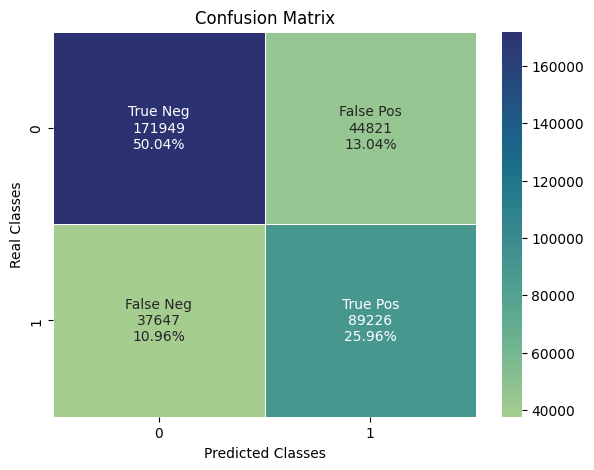

----------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81    216770
           1       0.67      0.70      0.68    126873

    accuracy                           0.76    343643
   macro avg       0.74      0.75      0.75    343643
weighted avg       0.76      0.76      0.76    343643


 ----------------Accuracy, precision, recall, f1_score and log loss----------------
Accuracy=0.76002
Precision=0.66563
Recall=0.70327
F1 Score=0.68393
LogLoss =  8.649813928098968


In [61]:
print("Train data results")
PlotConfusionMatrix(y_train,x_cfl.predict(X_train))

Test data results


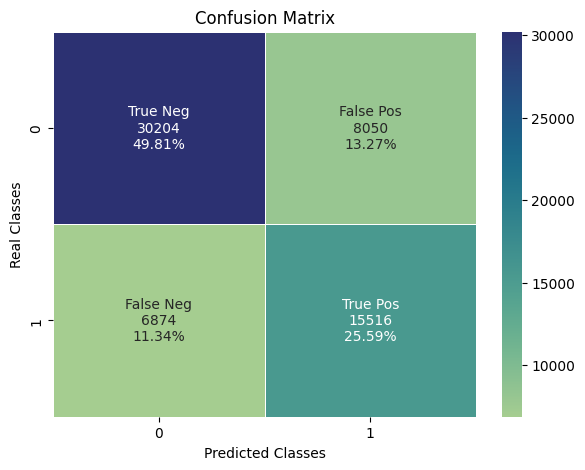

----------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     38254
           1       0.66      0.69      0.68     22390

    accuracy                           0.75     60644
   macro avg       0.74      0.74      0.74     60644
weighted avg       0.76      0.75      0.76     60644


 ----------------Accuracy, precision, recall, f1_score and log loss----------------
Accuracy=0.75391
Precision=0.65841
Recall=0.69299
F1 Score=0.67525
LogLoss =  8.870052819391603


In [62]:
print("Test data results")
PlotConfusionMatrix(y_test,x_cfl.predict(X_test))

In [63]:
#Train decile table
decile_tablel(y_train,x_cfl.predict_proba(X_train)[:,1],round_decimal=10,change_deciles=10)

,decile,prob_min,prob_max,ttl_customers,bad_customers,gd_customers,cum gd_customers,cum_bad_customers,KS,Lift,FP,cum FP,default_captr%
0,1,0.710826,0.998693,34365.0,27849.0,6516.0,6516.0,27849.0,18.944346,2.194985,0.23,0.23,21.95
1,2,0.635776,0.710825,34364.0,23421.0,10943.0,17459.0,51270.0,32.356330,2.020513,0.47,0.75,40.41
2,3,0.568303,0.635774,34364.0,21221.0,13143.0,30602.0,72491.0,43.019397,1.904554,0.62,1.44,57.14
3,4,0.492070,0.568301,34365.0,18434.0,15931.0,46533.0,90925.0,50.199623,1.791643,0.86,2.52,71.67
4,5,0.409538,0.492067,34364.0,15578.0,18786.0,65319.0,106503.0,53.811715,1.678887,1.21,4.19,83.94
5,6,0.297460,0.409538,34364.0,11938.0,22426.0,87745.0,118441.0,52.875597,1.555898,1.88,7.35,93.35
6,7,0.129714,0.297456,34365.0,6834.0,27531.0,115276.0,125275.0,45.561527,1.410573,4.03,16.87,98.74
7,8,0.006994,0.129714,34364.0,1564.0,32800.0,148076.0,126839.0,31.663011,1.249662,20.97,94.68,99.97
8,9,0.000009,0.006994,34364.0,34.0,34330.0,182406.0,126873.0,15.852747,1.111110,1009.71,5364.88,100.00
9,10,0.000000,0.000008,34364.0,0.0,34364.0,216770.0,126873.0,0.000000,1.000000,inf,inf,100.00


In [64]:
#Test decile table
decile_tablel(y_test,x_cfl.predict_proba(X_test)[:,1],round_decimal=10,change_deciles=10)

,decile,prob_min,prob_max,ttl_customers,bad_customers,gd_customers,cum gd_customers,cum_bad_customers,KS,Lift,FP,cum FP,default_captr%
0,1,0.711283,0.994664,6065.0,4773.0,1292.0,1292.0,4773.0,17.940128,2.131544,0.27,0.27,21.32
1,2,0.635558,0.711279,6064.0,4143.0,1921.0,3213.0,8916.0,31.422227,1.991035,0.46,0.78,39.82
2,3,0.566533,0.635517,6065.0,3762.0,2303.0,5516.0,12678.0,42.204086,1.887367,0.61,1.47,56.62
3,4,0.490891,0.566523,6064.0,3202.0,2862.0,8378.0,15880.0,49.023542,1.773084,0.89,2.62,70.92
4,5,0.409720,0.490861,6064.0,2748.0,3316.0,11694.0,18628.0,52.628504,1.663957,1.21,4.26,83.20
5,6,0.297243,0.409706,6065.0,2182.0,3883.0,15577.0,20810.0,52.223354,1.549029,1.78,7.14,92.94
6,7,0.130613,0.297221,6064.0,1222.0,4842.0,20419.0,22032.0,45.023647,1.405723,3.96,16.71,98.40
7,8,0.006980,0.130554,6065.0,346.0,5719.0,26138.0,22378.0,31.618909,1.249309,16.53,75.54,99.95
8,9,0.000009,0.006980,6064.0,12.0,6052.0,32190.0,22390.0,15.851937,1.111103,504.33,2682.50,100.00
9,10,0.000000,0.000009,6064.0,0.0,6064.0,38254.0,22390.0,0.000000,1.000000,inf,inf,100.00


In [65]:
# Lets store the xgboost pickle file
pickle_path = '/content/drive/MyDrive/Career/AI/NLP/QuoraQuestionPairSimilarity/'
pickle_out=open(pickle_path+'XGBoost_Model.pickle', 'wb')
pickle.dump(x_cfl,pickle_out)
pickle_out.close()

In [68]:
df_test_with_results=pd.DataFrame({'question1':df_final_withquestions['question1_for_dep'].iloc[X_test.index.to_list()],
                      'question2':df_final_withquestions['question2_for_dep'].iloc[X_test.index.to_list()],
                      'proba_1':x_cfl.predict_proba(X_test)[:,0],
                      'proba_2':x_cfl.predict_proba(X_test)[:,1],
                      'Prediction':x_cfl.predict(X_test),
                      'Actual':y_test})

In [69]:
df_test_with_results

,question1,question2,proba_1,proba_2,Prediction,Actual
402125,Why has the U.S. kept making dividisons betwee...,Why does the U.S. always make deep division be...,0.266179,7.338214e-01,1,1
19347,What is the significance of the Cherubim and S...,What are the roles of the Cherubim and Seraphim?,0.487496,5.125042e-01,1,1
117654,"You've got 24 hours to live, how will you spen...",If you are told that you have only 24 hours to...,0.364071,6.359294e-01,1,1
162790,"Why does Europe have a voltage of 220 V, Japan...",What's the household voltage in Europe and Ame...,0.999931,6.896776e-05,0,0
173061,How do I overcome depression and jealousy?,How do I overcome depression?,0.678870,3.211300e-01,0,1
...,...,...,...,...,...,...
362650,If God doesn't exist what really happens after...,Belief and Beliefs: Can the existence of a god...,0.999997,3.418108e-06,0,0
288469,Which are the scientists now pursuing stand up...,What stand-up comedian died at age 66?,0.999999,9.227122e-07,0,0
79295,What is the best way to learn white hat hacking?,What is the best way to start learning hacking?,0.467240,5.327600e-01,1,1
157514,I am a 37 year old single Indian man living in...,Where are the best places to meet Indian women...,0.937943,6.205660e-02,0,0


Test data results


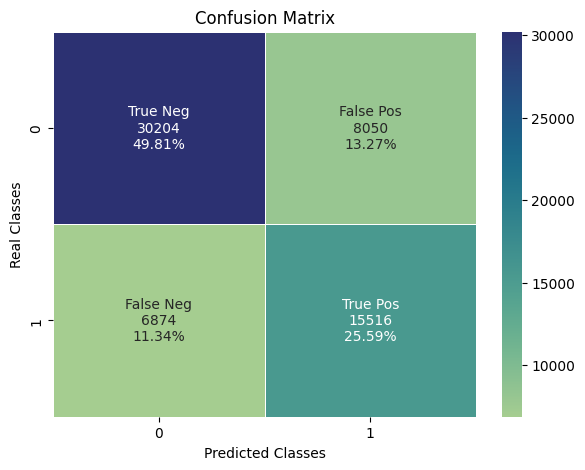

----------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     38254
           1       0.66      0.69      0.68     22390

    accuracy                           0.75     60644
   macro avg       0.74      0.74      0.74     60644
weighted avg       0.76      0.75      0.76     60644


 ----------------Accuracy, precision, recall, f1_score and log loss----------------
Accuracy=0.75391
Precision=0.65841
Recall=0.69299
F1 Score=0.67525
LogLoss =  8.870052819391603


In [70]:
#Checks for test dataframes
print("Test data results")
PlotConfusionMatrix(df_test_with_results['Actual'],df_test_with_results['Prediction'])

In [71]:
 # Lets store the test dataframe for future reference pickle file
pickle_path = '/content/drive/MyDrive/Career/AI/NLP/QuoraQuestionPairSimilarity/'
pickle_out=open(pickle_path+'df_test_with_results.pickle', 'wb')
pickle.dump(df_test_with_results,pickle_out)
pickle_out.close()